## Import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

Notice this we also include the special command %matplotlib inline to ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.

## Load the dataset

In [34]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Visualization

## lets analyse Data by plotting some graphs

## 1)How does the distribution of age, gender look across patients?

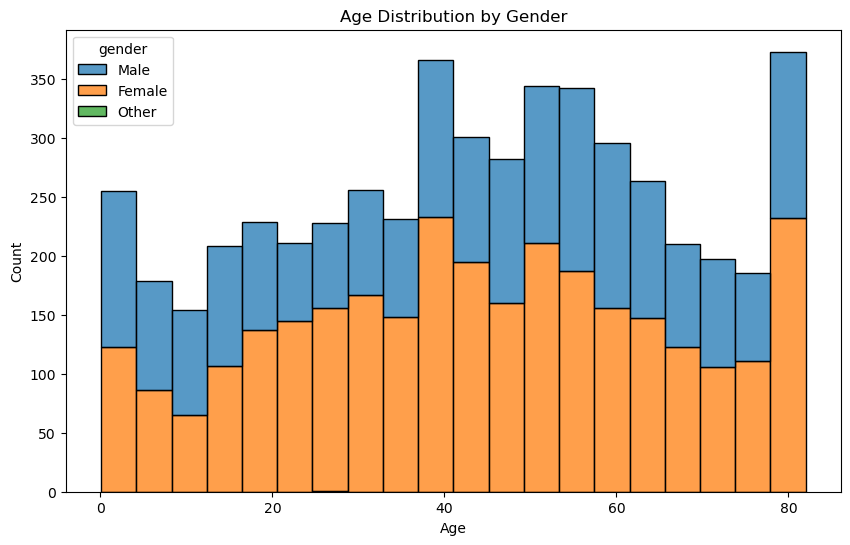

In [35]:
# lets try age distribution by gender

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="age", hue="gender", multiple="stack", bins=20)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


 Based on this Gender-Based Age Distribution plot we can say that we have little bit more of female data as compare to man. we have lot of data of people between the ages of 40 and 80. 

## 2)What is the distribution of stroke occurrences across different age groups?
*This question can help visualize how age impacts the likelihood of having a stroke.*

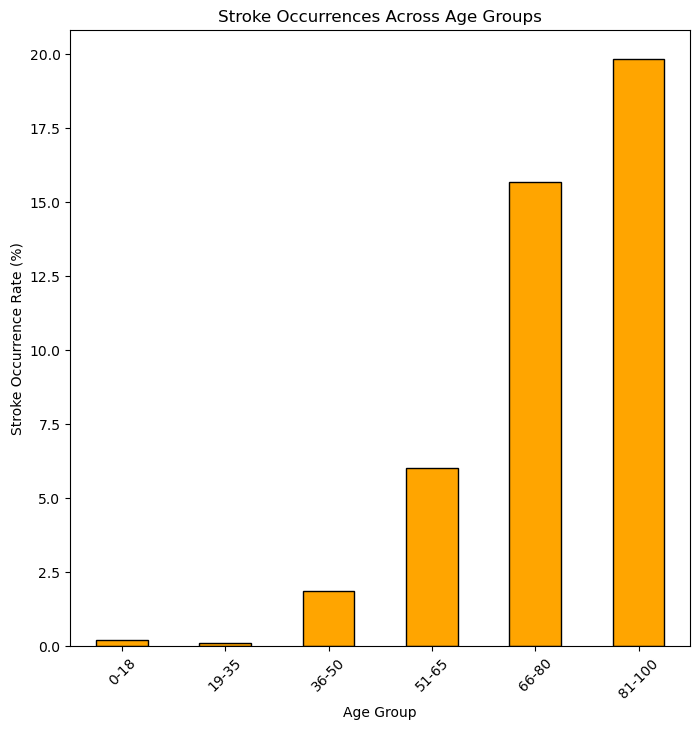

In [36]:
# 1. Define age groups
age_bins = [0, 18, 35, 50, 65, 80, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-100']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# 2. Calculate stroke occurrences in each age group
age_group_stroke = data.groupby('age_group', observed=True)['stroke'].sum()
age_group_total = data['age_group'].value_counts().sort_index()

# 3. Calculate the stroke rate
stroke_rate = (age_group_stroke / age_group_total) * 100

# 4. Visualize the distribution
plt.figure(figsize=(8, 8))
stroke_rate.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Stroke Occurrences Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Stroke Occurrence Rate (%)')
plt.xticks(rotation=45)
plt.show()


 <ul>
 <li>Highest Frequency: The age group 66-80 has the highest number of stroke occurrences, with 119 cases.</li>
 <li>Significant Increase: There is a noticeable increase in stroke occurrences starting from the 51-65 age group.</li>
 <li>Lower Frequency: The younger age groups (0-18 and 19-35) have the lowest occurrences.</li>
</ul>

### Conclusion and Insights
<ul>
 <li>Age-Related Risk: The risk of stroke increases significantly with age, particularly after 50.</li>
 <li>Preventive Focus: Efforts to prevent strokes should be intensified for individuals aged 51 and above, especially those in the 66-80 age group.</li>
</ul>

## 3)How does the average glucose level vary between individuals with and without hypertension?
*This question can provide insights into the relationship between glucose levels and hypertension.*

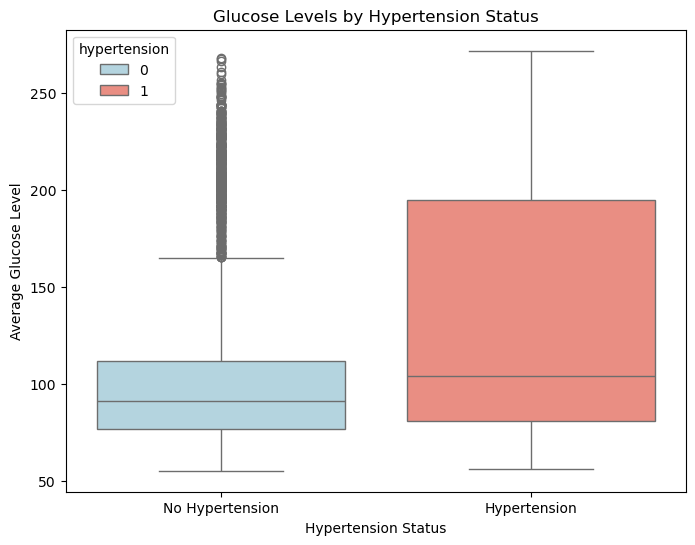

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='hypertension', y='avg_glucose_level', hue='hypertension', palette=['lightblue', 'salmon'], dodge=False)
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'])
plt.title('Glucose Levels by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Average Glucose Level')  
plt.show()




The analysis suggests a potential link between hypertension and higher average glucose levels. Individuals with hypertension tend to have not only higher but also more variable glucose levels.This could imply that hypertensive individuals are at an increased risk for elevated glucose levels, and they might benefit from regular monitoring and glucose management to prevent further health complications.

## 4)How does smoking status correlate with the incidence of stroke?
*This question can help visualize the impact of smoking habits on stroke risk*

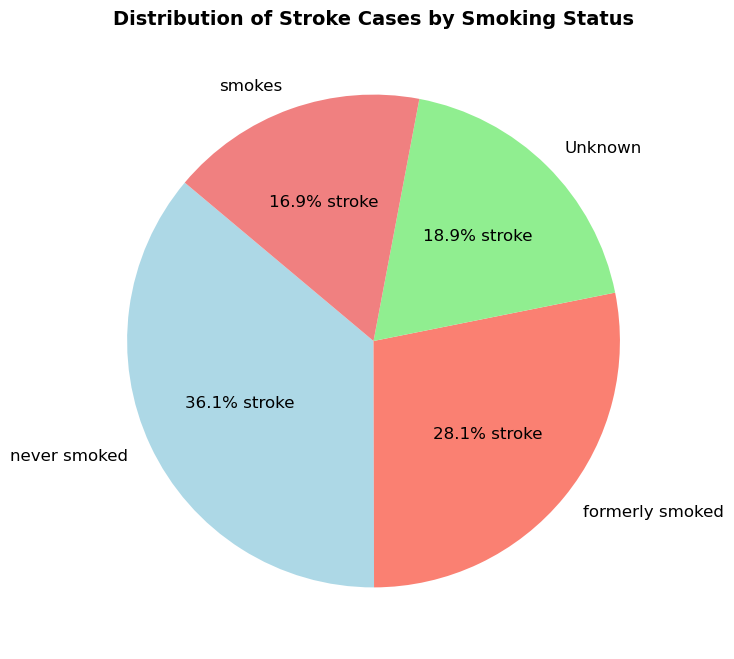

In [38]:
# Filter data to include only stroke cases
stroke_data = data[data['stroke'] == 1]

# Group by smoking status and count the stroke occurrences
smoking_stroke_counts = stroke_data['smoking_status'].value_counts()

# Function to format the autopct labels with " stroke" after each percentage
def autopct_format(pct):
    return f'{pct:.1f}% stroke'

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(smoking_stroke_counts, labels=smoking_stroke_counts.index, autopct=autopct_format, 
        startangle=140, colors=['lightblue', 'salmon', 'lightgreen', 'lightcoral'], 
        textprops={'fontsize': 12})

plt.title('Distribution of Stroke Cases by Smoking Status', fontsize=14, fontweight='bold')
plt.show()


While there is an observable presence of stroke cases among those who formerly smoked, current smokers surprisingly represent a smaller proportion. This analysis suggests that both former smokers and non-smokers have notable stroke risk factors, perhaps indicating that stroke risk may be influenced by a combination of lifestyle, medical history, and other health factors beyond smoking alone.

## 5) What is the relationship between BMI and stroke occurrences?
*This question can help understand if BMI is a significant factor in stroke risk.*

In [39]:
# Calculate the mean of the BMI column (ignoring NaN values)
mean_bmi = data['bmi'].mean()

# Replace NaN values in the BMI column with the calculated mean
data['bmi'] = data['bmi'].fillna(mean_bmi)

# Verify that there are no NaN values left in the BMI column
print(data['bmi'].isna().sum())  


0


In [40]:
data["bmi"]

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

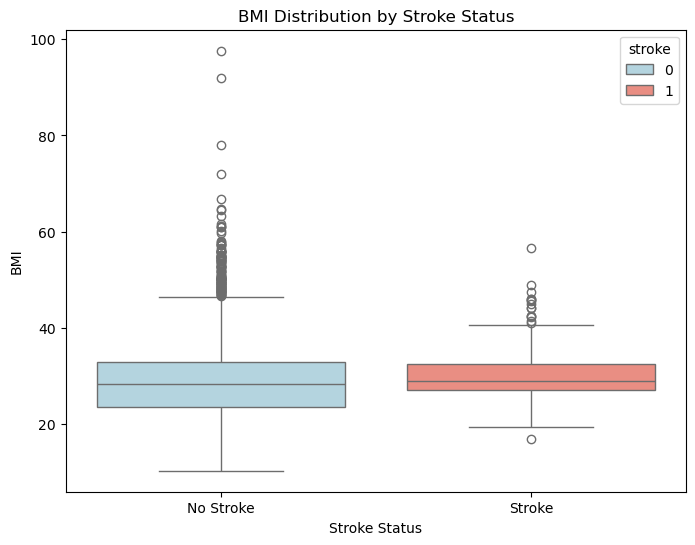

In [41]:

# Create a boxplot to compare BMI distribution between stroke and no stroke
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='bmi', data=data, hue='stroke', palette=['lightblue', 'salmon'], dodge=False)
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')
plt.show()



BMI and Stroke Relationship: Although individuals with a stroke have a slightly higher median BMI, the difference is not pronounced in this plot. This suggests that while BMI might have some association with stroke risk, it is not a sole indicator, as high BMI outliers are also present in the no-stroke group.

 ## 6) What is the relationship among  BMI, age, avg_glucose_level, and stroke.

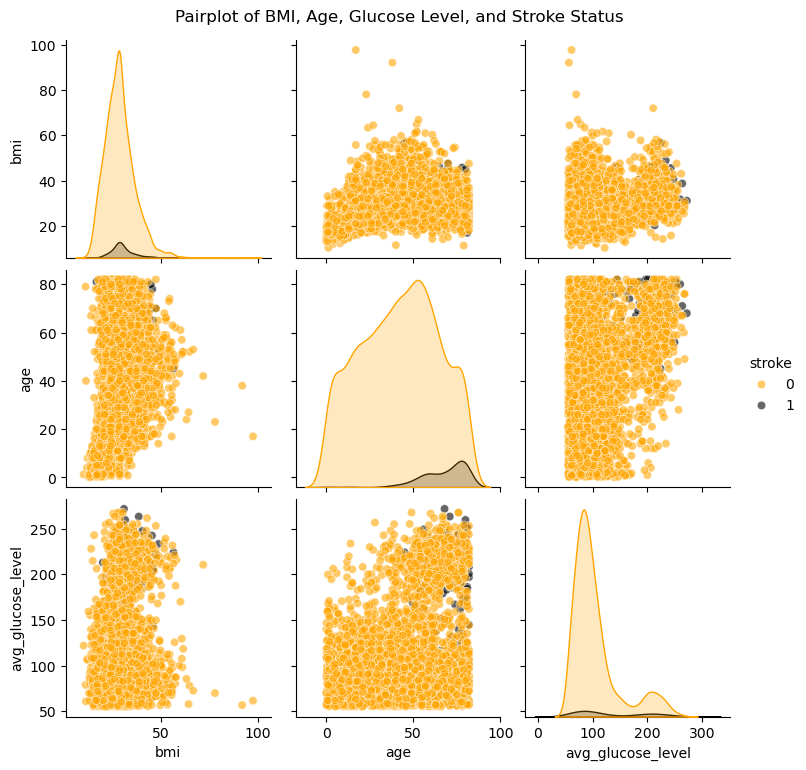

In [42]:
# Select relevant columns
selected_columns = ['bmi', 'age', 'avg_glucose_level', 'stroke']

# Create a pairplot with 'stroke' as hue to distinguish stroke vs no-stroke groups
sns.pairplot(data[selected_columns], hue='stroke', palette=['orange', 'black'], diag_kind='kde', plot_kws={'alpha': 0.6})

# Display the plot
plt.suptitle('Pairplot of BMI, Age, Glucose Level, and Stroke Status', y=1.02)
plt.show()


Based on the pairplot, here are some observations and conclusions regarding the relationship between BMI, Age, Glucose Level, and Stroke Status:
## Observations:
**1.BMI vs. Stroke:**
  <ul>
  <li>The distribution of BMI is mostly similar for individuals with and without a stroke.</li>
  <li>There are some stroke cases among individuals with high BMI values, but the correlation is not very distinct.</li>
  </ul>
  
**2.Age vs. Stroke:**
   <ul>
  <li>There is a noticeable increase in stroke occurrences with higher age values. Many stroke cases are clustered among older individuals, particularly those above 50.</li>
  <li>Younger individuals (below 50) show fewer stroke cases, suggesting age could be a significant factor in stroke risk.
</li>
  </ul>
  
**3.Average Glucose Level vs. Stroke:**
  <ul>
  <li>Individuals with strokes tend to have a higher average glucose level, although there are also many high glucose levels among individuals without a stroke.
</li>
  <li>This suggests that high glucose levels could be associated with a higher risk of stroke but might not be a definitive predictor on their own.</li>
  </ul>
  
**4.Relationship Between BMI, Age, and Glucose Level:**
  <ul>
  <li>There isn’t a strong visible correlation between BMI and age or between BMI and average glucose level in terms of stroke occurrences.</li>
  <li>However, age and glucose level show a moderate association with stroke when examined independently.</li>
  </ul>

## Conclusion:

- **Age and Glucose Level as Key Factors:** Age and average glucose level appear to have a stronger association with stroke occurrences than BMI. Older age and higher glucose levels are more commonly observed among individuals who have had a stroke.</il>
- **BMI’s Limited Impact:** BMI alone does not show a clear trend or correlation with stroke, although there are stroke cases in higher BMI ranges.   


<b>Wonderful!</b>

# Data encoding
let's analyse data and convert data in 0's and 1's from  because the model knows only 0's and 1's values. 

### let's Convert Residence_type column to Rural/Urban col (0 = rural, 1 =urban)

In [43]:
data['Urban/Rural'] = data['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,Urban/Rural
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,66-80,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,51-65,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,66-80,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,36-50,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,66-80,0


 ### let's Convert work_type column to 4 different columns (Never_worked,Private,Self-employed,Unknown)

In [44]:
#lets check unique value
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [45]:
data['smokes'] = data['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)
data['never smoked'] = data['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
data['formerly smoked'] = data['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
data['Unknown'] = data['smoking_status'].apply(lambda x: 1 if x == 'Unknown' else 0)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,Urban/Rural,smokes,never smoked,formerly smoked,Unknown
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,66-80,1,0,0,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,51-65,0,0,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,66-80,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,36-50,1,1,0,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,66-80,0,0,1,0,0


### let's Convert smoking_status columns to 5 different columns

In [46]:
#lets check unique value
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [47]:
data['Private'] = data['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
data['Self-employed'] = data['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)
data['Govt_job'] = data['work_type'].apply(lambda x: 1 if x == 'Govt_job' else 0)
data['children'] = data['work_type'].apply(lambda x: 1 if x == 'children' else 0)
data['Never_worked'] = data['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Urban/Rural,smokes,never smoked,formerly smoked,Unknown,Private,Self-employed,Govt_job,children,Never_worked
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,1,0,0,1,0,1,0,0,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,0,1,0,0,0,1,0,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0,0,1,0,0,1,0,0,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,1,1,0,0,0,1,0,0,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,0,1,0,0,0,1,0,0,0


 ### let's drop the Residence_type, work_type and smoking_status columns.

In [48]:
data.drop('Residence_type',axis=1,inplace=True)
data.drop('smoking_status',axis=1,inplace=True)
data.drop('work_type',axis=1,inplace=True)
data.drop('age_group',axis=1,inplace=True)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Urban/Rural,smokes,never smoked,formerly smoked,Unknown,Private,Self-employed,Govt_job,children,Never_worked
0,9046,Male,67.0,0,1,Yes,228.69,36.600000,1,1,0,0,1,0,1,0,0,0,0
1,51676,Female,61.0,0,0,Yes,202.21,28.893237,1,0,0,1,0,0,0,1,0,0,0
2,31112,Male,80.0,0,1,Yes,105.92,32.500000,1,0,0,1,0,0,1,0,0,0,0
3,60182,Female,49.0,0,0,Yes,171.23,34.400000,1,1,1,0,0,0,1,0,0,0,0
4,1665,Female,79.0,1,0,Yes,174.12,24.000000,1,0,0,1,0,0,0,1,0,0,0


<b>Wonderful!</b>

**Now we only have the data which is in the form of 0's & 1's**

**we can use it for traning a model**